In [2]:
import pandas as pd
import numpy as np
import requests
import json
from matplotlib import pyplot as plt

omdb_key = 'afd4c6'

In [1]:
awards_file = "../the_oscar_award.csv"
topBoxoffice_file = "../boxoffice_all.csv"
yearTopBoxoffice_file = "../topBoxOffice_year.csv"

In [3]:
award_df = pd.read_csv(awards_file)
award_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS IN A LEADING ROLE,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS IN A LEADING ROLE,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [4]:
bestPicture = set(['BEST PICTURE','BEST MOTION PICTURE', 'OUTSTANDING MOTION PICTURE', 'OUTSTANDING PICTURE','OUTSTANDING PRODUCTION'])
test = [category in bestPicture for category in award_df.category]

In [5]:
movie_df = award_df[test & (award_df.winner == True)].sort_values('year_ceremony').reset_index(drop = True)

In [6]:
movie_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,BEST PICTURE,Paramount Famous Lasky,Wings,True
1,1928,1929,2,BEST PICTURE,Metro-Goldwyn-Mayer,The Broadway Melody,True
2,1929,1930,3,BEST PICTURE,Universal,All Quiet on the Western Front,True
3,1930,1931,4,BEST PICTURE,RKO Radio,Cimarron,True
4,1931,1932,5,BEST PICTURE,Metro-Goldwyn-Mayer,Grand Hotel,True
...,...,...,...,...,...,...,...
87,2015,2016,88,BEST PICTURE,"Michael Sugar, Steve Golin, Nicole Rocklin and...",Spotlight,True
88,2016,2017,89,BEST PICTURE,"Adele Romanski, Dede Gardner and Jeremy Kleine...",Moonlight,True
89,2017,2018,90,BEST PICTURE,"Guillermo del Toro and J. Miles Dale, Producers",The Shape of Water,True
90,2018,2019,91,BEST PICTURE,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True


In [7]:
def getInfo(name, year = ''):
    url = "http://www.omdbapi.com/?t=" + name
    if year != "":
        url += "&y=" + str(year)
        
    api_key = "&apikey=" + omdb_key

    try:
        response = requests.get(url + name + api_key).json()
    except:
        print(f"did not find{url}")
    return response

def getBoxoffice(x):
    boxoffice = x['BoxOffice']
    boxoffice = boxoffice.replace(',', '')
    boxoffice = boxoffice.replace('$', '')
    try:
        value = int(boxoffice)
    except: 
        value = 0
        
    return value

In [8]:
result = [getBoxoffice(getInfo(x, y)) for x, y in zip(movie_df['film'], movie_df['year_film'])]

In [9]:
movie_df['BoxOffice'] = result

In [10]:
movie_df

,year_film,year_ceremony,ceremony,category,name,film,winner,BoxOffice
0,1927,1928,1,BEST PICTURE,Paramount Famous Lasky,Wings,True,0
1,1928,1929,2,BEST PICTURE,Metro-Goldwyn-Mayer,The Broadway Melody,True,0
2,1929,1930,3,BEST PICTURE,Universal,All Quiet on the Western Front,True,0
3,1930,1931,4,BEST PICTURE,RKO Radio,Cimarron,True,0
4,1931,1932,5,BEST PICTURE,Metro-Goldwyn-Mayer,Grand Hotel,True,0
...,...,...,...,...,...,...,...,...
87,2015,2016,88,BEST PICTURE,"Michael Sugar, Steve Golin, Nicole Rocklin and...",Spotlight,True,45055776
88,2016,2017,89,BEST PICTURE,"Adele Romanski, Dede Gardner and Jeremy Kleine...",Moonlight,True,27854932
89,2017,2018,90,BEST PICTURE,"Guillermo del Toro and J. Miles Dale, Producers",The Shape of Water,True,63859435
90,2018,2019,91,BEST PICTURE,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True,85080171


In [11]:
#remove the movies with out a box office value
box_df = movie_df[movie_df['BoxOffice'] > 0]

In [12]:
box_df 

,year_film,year_ceremony,ceremony,category,name,film,winner,BoxOffice
11,1939,1940,12,BEST PICTURE,Selznick International Pictures,Gone with the Wind,True,200852579
15,1943,1944,16,BEST PICTURE,Warner Bros.,Casablanca,True,4108411
16,1944,1945,17,BEST PICTURE,Paramount,Going My Way,True,16300000
18,1946,1947,19,BEST PICTURE,Samuel Goldwyn Productions,The Best Years of Our Lives,True,23650000
20,1948,1949,21,BEST PICTURE,J. Arthur Rank-Two Cities Films,Hamlet,True,4708156
...,...,...,...,...,...,...,...,...
87,2015,2016,88,BEST PICTURE,"Michael Sugar, Steve Golin, Nicole Rocklin and...",Spotlight,True,45055776
88,2016,2017,89,BEST PICTURE,"Adele Romanski, Dede Gardner and Jeremy Kleine...",Moonlight,True,27854932
89,2017,2018,90,BEST PICTURE,"Guillermo del Toro and J. Miles Dale, Producers",The Shape of Water,True,63859435
90,2018,2019,91,BEST PICTURE,"Jim Burke, Charles B. Wessler, Brian Currie, P...",Green Book,True,85080171


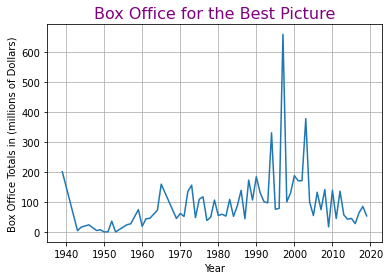

In [17]:
#plot the boxoffice for the winning movie 
plt.plot(box_df.year_film, box_df.BoxOffice/1e6)
plt.title("Box Office for the Best Picture",size=16, color="purple")
plt.xlabel("Year")
plt.ylabel("Box Office Totals in (millions of Dollars)")
plt.grid(True)
plt.show()

In [18]:
# show the top ten movies by boxoffice
top_box = box_df.sort_values('BoxOffice', ascending = False).reset_index(drop= True)
top_box.head(10)

,year_film,year_ceremony,ceremony,category,name,film,winner,BoxOffice
0,1997,1998,70,BEST PICTURE,"James Cameron and Jon Landau, Producers",Titanic,True,659363944
1,2003,2004,76,BEST PICTURE,"Barrie M. Osborne, Peter Jackson and Fran Wals...",The Lord of the Rings: The Return of the King,True,377845905
2,1994,1995,67,BEST PICTURE,"Wendy Finerman, Steve Tisch and Steve Starkey,...",Forrest Gump,True,330455270
3,1939,1940,12,BEST PICTURE,Selznick International Pictures,Gone with the Wind,True,200852579
4,2000,2001,73,BEST PICTURE,"Douglas Wick, David Franzoni and Branko Lustig...",Gladiator,True,187705427
5,1990,1991,63,BEST PICTURE,"Jim Wilson and Kevin Costner, Producers",Dances With Wolves,True,184208848
6,1988,1989,61,BEST PICTURE,"Mark Johnson, Producer",Rain Man,True,172825435
7,2001,2002,74,BEST PICTURE,"Brian Grazer and Ron Howard, Producers",A Beautiful Mind,True,170742341
8,2002,2003,75,BEST PICTURE,"Martin Richards, Producer",Chicago,True,170687518
9,1965,1966,38,BEST PICTURE,"Robert Wise, Producer",The Sound of Music,True,159287539


In [97]:
boxoffice_alltime = pd.read_csv(topBoxoffice_file)
toptop = float(boxoffice_alltime.iloc[0,2].replace(",","").replace("$",""))/ 1e6
topname = boxoffice_alltime.iloc[0,1]

In [21]:
boxoffice_alltime.head(10)

,rank,Title,Total Boxoffice,year
0,1,Avatar,"$2,847,246,203",2009
1,2,Avengers: Endgame,"$2,797,501,328",2019
2,3,Titanic,"$2,201,647,264",1997
3,4,Star Wars: Episode VII - The Force Awakens,"$2,068,455,677",2015
4,5,Avengers: Infinity War,"$2,048,359,754",2018
5,6,Jurassic World,"$1,670,516,444",2015
6,7,The Lion King,"$1,657,870,986",2019
7,8,The Avengers,"$1,518,815,515",2012
8,9,Furious 7,"$1,515,255,622",2015
9,10,Frozen II,"$1,450,026,933",2019


In [22]:
boxoffice_byyear = pd.read_csv(yearTopBoxoffice_file)

In [23]:
boxoffice_byyear

,year,Title,boxoffice,in dollars
0,2021,"Hi, Mom",821.42,821420000
1,2020,The Eight Hundred,461.34,461340000
2,2019,Avengers: Endgame,"2,797.5",2797500000
3,2018,Avengers: Infinity War,"2,048.36",2048360000
4,2017,Star Wars: Episode VIII - The Last Jedi,"1,332.54",1332540000
...,...,...,...,...
102,1919,The Miracle Man**,3,3000000
103,1918,Mickey**,17.2,17200000
104,1917,A Romance of the Redwoods**,0.42,420000
105,1916,Joan the Woman**,1.32,1320000



```pandas
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```

In [41]:
winners = box_df[["year_film", 'film', "BoxOffice"]]


winner_boxoffice = winners.merge(boxoffice_byyear, left_on="year_film", right_on= "year", how = 'left')
winner_boxoffice['Both'] = winner_boxoffice.film == winner_boxoffice.Title


In [42]:
both



[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 64    False
 65    False
 66    False
 67    False
 68    False
 Length: 69, dtype: bool]

In [43]:
winner_boxoffice

,year_film,film,BoxOffice,year,Title,boxoffice,in dollars,Both
0,1939,Gone with the Wind,200852579,1939,Gone With the Wind,402.35,402350000,False
1,1943,Casablanca,4108411,1943,This is the Army**,20.83,20830000,False
2,1944,Going My Way,16300000,1944,Going My Way**,16.3,16300000,False
3,1946,The Best Years of Our Lives,23650000,1946,Song of the South,37.46,37460000,False
4,1948,Hamlet,4708156,1948,The Snake Pit**,10,10000000,False
...,...,...,...,...,...,...,...,...
64,2015,Spotlight,45055776,2015,Star Wars: Episode VII - The Force Awakens,"2,068.22",2068220000,False
65,2016,Moonlight,27854932,2016,Captain America: Civil War,"1,153.3",1153300000,False
66,2017,The Shape of Water,63859435,2017,Star Wars: Episode VIII - The Last Jedi,"1,332.54",1332540000,False
67,2018,Green Book,85080171,2018,Avengers: Infinity War,"2,048.36",2048360000,False


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylog'

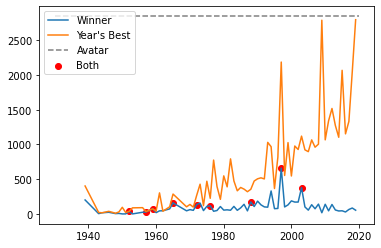

In [99]:
plt.plot(winner_boxoffice.year ,winner_boxoffice.BoxOffice/1e6,label='Winner')
plt.plot(winner_boxoffice.year ,winner_boxoffice['in dollars']/1e6,label="Year's Best")
both = winner_boxoffice[winner_boxoffice.Both]
plt.hlines(toptop,xmin=1930, xmax=2020,color='gray',linestyle='dashed',label=topname)
plt.scatter(both.year, both.BoxOffice/1e6,color='red',label="Both")

plt.legend()
plt.ylog()
plt.title("Box Office for Winners vs Years Best", color="green", size = 20)
plt.show()

In [84]:
toptop

2847.246203